In [1]:
import numpy as np
import scipy.stats as stats
import seaborn as sns
import pandas as pd
import statsmodels.api as sm

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.patches as patches

%config InlineBackend.figure_format = 'retina'
%matplotlib inline

sns.set_style('darkgrid')

from ipywidgets import *
from IPython.display import display

In [18]:
x = np.array([1,2,3,4,5,6,7,8,9,10,11,12,13,14,15])+np.random.normal(1,1,size=15)
y = x.copy()
y = y + np.random.normal(5,2,size=15)

In [19]:
x

array([  2.19509599,   4.4590662 ,   4.68483112,   3.4796805 ,
         5.34613396,   6.53751853,   7.27873351,   9.11351003,
        11.05477951,  12.54503286,  13.05862169,  12.8018678 ,
        14.5365456 ,  15.42719651,  15.61918339])

In [20]:
y

array([  6.33636983,   9.56629875,  10.99118832,   8.66266694,
         7.85284463,  15.56882339,  10.70368655,  15.31398397,
        17.67682481,  15.03656659,  16.7432008 ,  14.06021823,
        17.6779068 ,  21.59977636,  18.7682104 ])

In [21]:
def plot_regression(x, y, pmin, pmax):

    fig = plt.figure(figsize=(5,5))
    
    ax = fig.gca()

    ax.set_xlim([pmin, pmax])
    ax.set_ylim([pmin, pmax])
    
    sqmod = sm.OLS(y, x).fit()
    absmod = sm.QuantReg(y, x).fit()
    
    ax.scatter(x, y, s=70, color='steelblue')

    ax.plot([pmin, pmax], [sqmod.predict(pmin)[0], sqmod.predict(pmax)[0]],
            color='darkred', lw=2, alpha=0.5)
    ax.plot([pmin, pmax], [absmod.predict(pmin)[0], absmod.predict(pmax)[0]],
            color='darkgoldenrod', lw=2, alpha=0.5)
    
    ax.axvline(0, lw=2, c='black', linestyle='dashed')
    ax.axhline(0, lw=2, c='black', linestyle='dashed')
    
    for x_, y_, ys, ya in zip(x, y, sqmod.fittedvalues, absmod.fittedvalues):
        
        ax.plot([x_, x_], [y_, ys], color='darkred', linestyle='dotted', linewidth=1.5)
        ax.plot([x_, x_], [y_, ya], color='darkgoldenrod', linestyle='dotted', linewidth=1.5)
    
    plt.tight_layout()
    
    fig.show()


In [24]:
def plot_delegator(outlier):
    yr = y.copy()
    yr[13] += outlier
    plot_regression(x, yr, -5, 100)
    

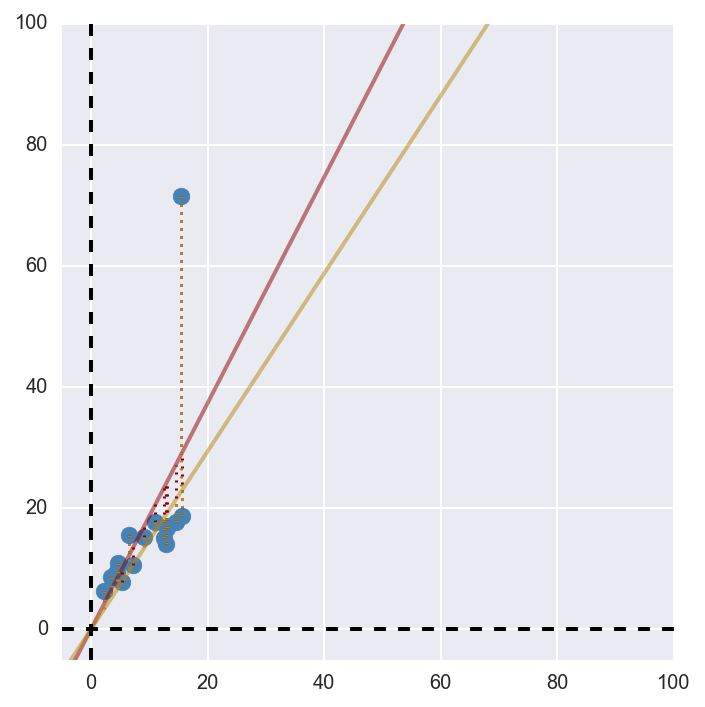

In [25]:
interact(plot_delegator,
         outlier=widgets.FloatSlider(min=0, max=50, 
                                     step=1, value=0, continuous_update=True))